# TOC:
- [Description](#1)
- [Importing modules](#2)
- [Loading data](#3)
- [Data inspection](#4)  
     - [Duplicates](#5)
     - [Null values](#6)
     - [Dtypes](#7)
- [Explanatory Data Analysis](#8)
     - [Describe variables](#9)
     - [Dependent variable](#10)
     - [Datetime series](#11)
         - [Day of Week](#12)
         - [Month](#13)
         - [Year](#14)
     - [Continuous numerical features](#15)
         - [Drop observations with average prices = 0](#22)
     - [Discrete numerical features](#16)
     - [Binary and categorical features](#17)
     - [Bivariate Analysis](#18)
          - [Correlation matrix](#19)
          - [Bivariate relation most predicting features](#20)
- [Models](#21)
     - [Importing modules](#23)
     - [Logistic Regression](#24)
          - [Features selection](#25)
          - [Encode categorical features](#26)
          - [Split sets](#27)
          - [Scale features](#28)
          - [Fit model](#29)
          - [Coefficients](#30)
          - [Scores](#31)
          - [GridSearch](#32)
          - [Cross-validation](#33)
     - [Decision Trees](#34)
          - [Features selection](#35)
          - [Encode categorical features](#36)
          - [Split sets](#37)
          - [Fit model](#38)
          - [Scores](#39)
          - [GridSearch](#40)
          - [Cross-validation](#41)

# Description <a class="anchor" id="1"></a>

* A significant number of hotel bookings are called off because of cancellations and no-shows.
* Revenue losses can be high when free cancellation options or low cost penalties apply, particularly on last-minute cancellations.
* A dataset containing information of hotel bookings is used to build ML models to predict cancellations.
* A logistic regression and a decision tree help to find the factors affecting the bookings cancellations.

# Importing modules <a class="anchor" id="2"></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcdefaults() # get the default theme

from sklearn import metrics
from sklearn import preprocessing

# for ignoring warnings
import warnings
warnings.simplefilter("ignore")

# Loading data <a class="anchor" id="3"></a>

In [2]:
df = pd.read_csv("hotel_bookings.csv")
display(df.head())
df.info()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

# Data inspection <a class="anchor" id="4"></a>

## Duplicates <a class="anchor" id="5"></a>

In [3]:
print(df.shape)
print(df[df.duplicated()].shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(56926, 18)
(14350, 18)
(42576, 18)


## Null values <a class="anchor" id="6"></a>

In [4]:
#print(list(df.columns))
print(df.isnull().values.any()) #Check for NaN

False


## Dtypes <a class="anchor" id="7"></a>

In [5]:
print(df.dtypes)

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object


# Explanatory Data Analysis <a class="anchor" id="8"></a>

## Describe variables <a class="anchor" id="9"></a>

In [6]:
display(df.describe()) #Numerical dtypes
display(df.describe(include=[object])) #Object dtypes

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,42576.000000,42576.000000,42576.000000,42576.000000,42576.000000,42576.000000,42576.000000,42576.000000,42576.000000,42576.000000,42576.000000,42576.000000,42576.000000,42576.000000
mean,1.916737,0.142146,0.895270,2.321167,0.034362,77.315953,2018.297891,6.365488,15.682873,0.030886,0.025413,0.222731,112.375800,0.768109
std,0.527524,0.459920,0.887864,1.519328,0.182160,77.279616,0.626126,3.051924,8.813991,0.173011,0.358194,2.242308,40.865896,0.837264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,16.000000,2018.000000,4.000000,8.000000,0.000000,0.000000,0.000000,85.500000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,53.000000,2018.000000,6.000000,16.000000,0.000000,0.000000,0.000000,107.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,118.000000,2019.000000,9.000000,23.000000,0.000000,0.000000,0.000000,135.000000,1.000000
max,4.000000,10.000000,8.000000,17.000000,1.000000,521.000000,2019.000000,12.000000,31.000000,1.000000,13.000000,72.000000,540.000000,5.000000


,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,42576,42576,42576,42576
unique,4,7,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,31863,29730,34169,28089


## Dependent variable <a class="anchor" id="10"></a>

,booking_status
Not_Canceled,28089
Canceled,14487


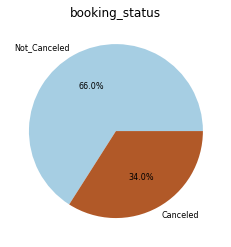

In [7]:
#display(df['booking_status'].value_counts(normalize= True).to_frame().style.format('{:.2%}'))
display(df['booking_status'].value_counts(normalize= False).to_frame())

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
plt.title('booking_status', fontsize = 12)
df['booking_status'].value_counts().plot(kind='pie', fontsize = 8, autopct='%.1f%%', colormap='Paired')

axes.set_ylabel('')
plt.show(fig); plt.close(fig)

## Datetime series <a class="anchor" id="11"></a>

In [8]:
#convert dates
df[['arrival_year', 'arrival_month', 'arrival_date']] = df[['arrival_year', 'arrival_month', 'arrival_date']].astype("string", copy=True)
df['arrival_date_string'] = df['arrival_month'] + '/' + df['arrival_date'] + '/' + df['arrival_year']
df[['arrival_year', 'arrival_month', 'arrival_date']] = df[['arrival_year', 'arrival_month', 'arrival_date']].astype('int64', copy=True)

#Changing wrong date '29/02/2018' to next date '3/1/2018' in 55 observations
df['arrival_date_string'] = df['arrival_date_string'].apply(lambda x: '3/1/2018' if x == '2/29/2018' else x)
df['arrival_date_datetime'] = pd.to_datetime(df['arrival_date_string'])

#adding feature 'arrival_day_of_week'
df['arrival_day_of_week'] = df['arrival_date_datetime'].dt.day_name()
df['arrival_day_of_week_num'] = df['arrival_date_datetime'].dt.dayofweek

### Day of Week <a class="anchor" id="12"></a>

arrival_day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
booking_status,,,,,,,
Not_Canceled,13.2%,14.8%,16.2%,13.6%,13.0%,14.3%,14.8%
Canceled,15.0%,13.1%,15.2%,11.9%,12.4%,15.5%,17.0%


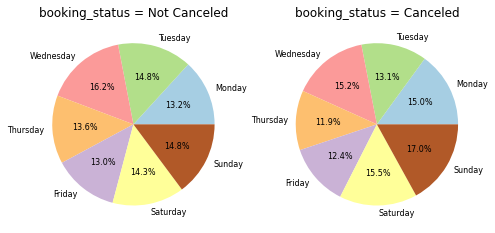

In [9]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_cross_tab = pd.crosstab(df['booking_status'], df['arrival_day_of_week'], normalize = 'index').round(3)
day_cross_tab =day_cross_tab[labels].sort_index(axis=0, ascending=False, inplace=False)
display(day_cross_tab.style.format('{:.1%}'))

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
day_cross_tab.loc['Not_Canceled'].plot(kind='pie', fontsize = 8, ax=ax1, autopct='%.1f%%', colormap='Paired')
day_cross_tab.loc['Canceled'].plot(kind='pie', fontsize = 8, ax=ax2, autopct='%.1f%%', colormap='Paired')
ax1.set_title('booking_status = Not Canceled', fontsize = 12)
ax2.set_title('booking_status = Canceled', fontsize = 12)
ax1.set_ylabel('')
ax2.set_ylabel('')

plt.show(fig); plt.close(fig)

### Month <a class="anchor" id="13"></a>

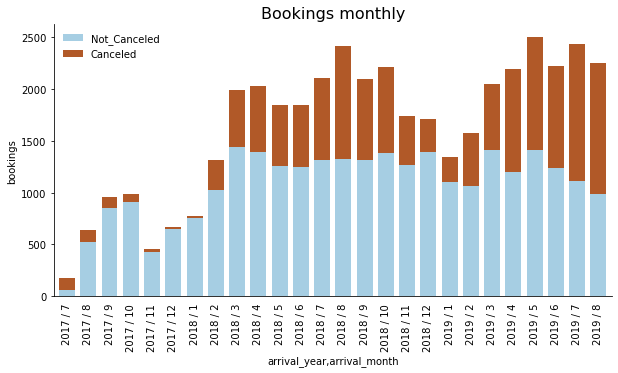

In [10]:
time_serie = df.groupby(['arrival_year', 'arrival_month'])['booking_status'].value_counts()

time_serie = pd.DataFrame(time_serie)
time_serie.columns = ['counts']
time_serie.reset_index(level='booking_status', inplace = True)

Not_Canceled = time_serie[time_serie['booking_status']=='Not_Canceled']
Not_Canceled = Not_Canceled.drop('booking_status', axis = 1)
Not_Canceled.columns = ['Not_Canceled']

Canceled = time_serie[time_serie['booking_status']=='Canceled']
Canceled = Canceled.drop('booking_status', axis = 1)
Canceled.columns = ['Canceled']

time_serie = pd.concat([Not_Canceled,Canceled], axis=1)

fig, ax = plt.subplots()
time_serie.plot(kind = 'bar', figsize=(10,5), colormap='Paired', ax=ax, stacked=True, width=0.75)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.legend(frameon=False)
plt.title('Bookings monthly', fontsize = 16)
plt.ylabel('bookings')
ax.xaxis.set_ticks_position('none') 
ax.set_xticklabels(str(i)+' / '+str(j) for i,j in time_serie.index.values)
plt.show(fig); plt.close(fig)

### Year <a class="anchor" id="14"></a>

In [11]:
table_year = time_serie.groupby('arrival_year')['Not_Canceled', 'Canceled'].sum()
display(table_year)
table_year_perc = table_year.div(table_year.sum(axis=1), axis=0)
display(table_year_perc.style.format('{:.1%}'))

,Not_Canceled,Canceled
arrival_year,,
2017,3417,476
2018,15141,6966
2019,9531,7045


,Not_Canceled,Canceled
arrival_year,,
2017,87.8%,12.2%
2018,68.5%,31.5%
2019,57.5%,42.5%


## Continuous numerical features <a class="anchor" id="15"></a>

In [34]:
feat_numeric_cont = ['avg_price_per_room', 'lead_time']

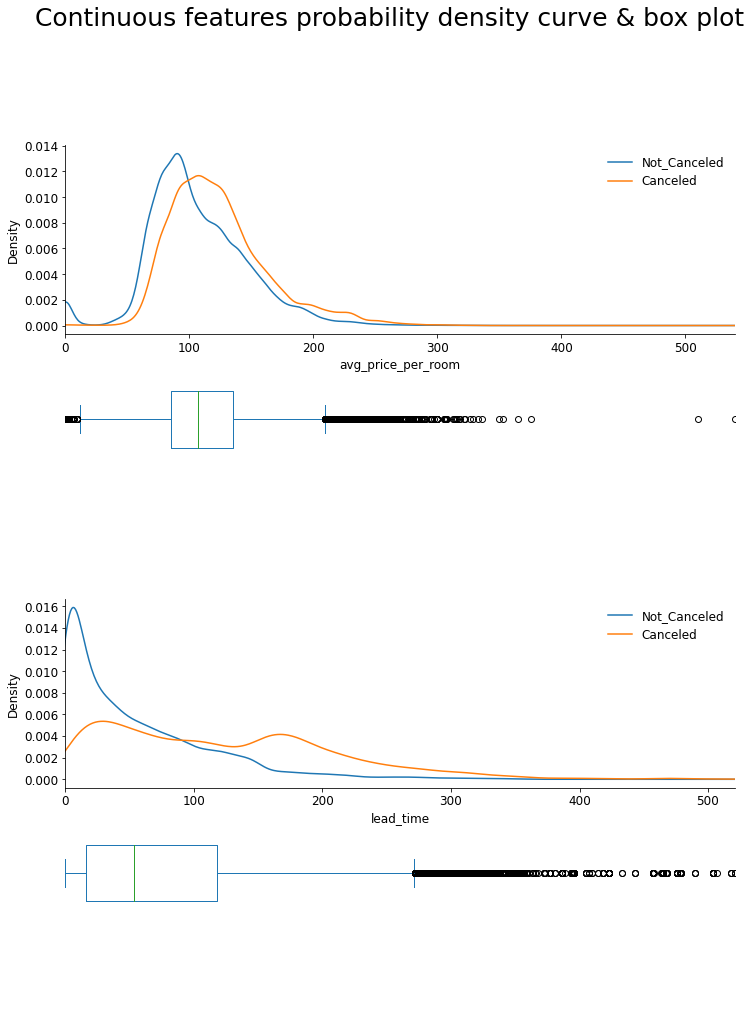

In [43]:
fig, axes = plt.subplots(nrows=len(feat_numeric_cont) * 2, ncols=1,figsize=(12, 8*len(feat_numeric_cont)))
fig.suptitle('Continuous features probability density curve & box plot\n', fontsize = 25, y = 1)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
#fig.tight_layout()

for i in range (len(feat_numeric_cont)):
    x_lim = (min(df[feat_numeric_cont[i]]),max(df[feat_numeric_cont[i]]))
    df[df['booking_status']=='Not_Canceled'][feat_numeric_cont[i]].plot(kind = 'kde', ax=axes[i*2], fontsize = 12, xlim = x_lim)
    df[df['booking_status']=='Canceled'][feat_numeric_cont[i]].plot(kind = 'kde',ax=axes[i*2], fontsize = 12)
    axes[i*2].spines.right.set_visible(False)
    axes[i*2].spines.top.set_visible(False)
    axes[i*2].legend(['Not_Canceled', 'Canceled'], frameon=False, fontsize = 12)
    #axes[i*2].set_title('Probability density curve', fontsize = 12)
    axes[i*2].set_xlabel(feat_numeric_cont[i], fontsize = 12)
    axes[i*2].set_ylabel('Density', fontsize = 12)

    df[feat_numeric_cont[i]].plot(kind='box', ax=axes[i*2+1], fontsize = 12, vert = False, widths = 0.6, xlim = x_lim)
    axes[i*2+1].spines.left.set_visible(False)
    axes[i*2+1].spines.right.set_visible(False)
    axes[i*2+1].spines.top.set_visible(False)
    axes[i*2+1].spines.bottom.set_visible(False)
    axes[i*2+1].xaxis.set_ticks_position('none')
    axes[i*2+1].yaxis.set_ticks_position('none')
    axes[i*2+1].set_yticklabels([])
    axes[i*2+1].set_xticklabels([])
    axes[i*2+1].set_ylim(-0.5)

plt.show(fig); plt.close(fig)

## Drop observations with average prices = 0 <a class="anchor" id="22"></a>

In [44]:
print(len(df[df['avg_price_per_room']<=0]))
df = df[df['avg_price_per_room']>0]
print (df.shape)

641
(41935, 22)


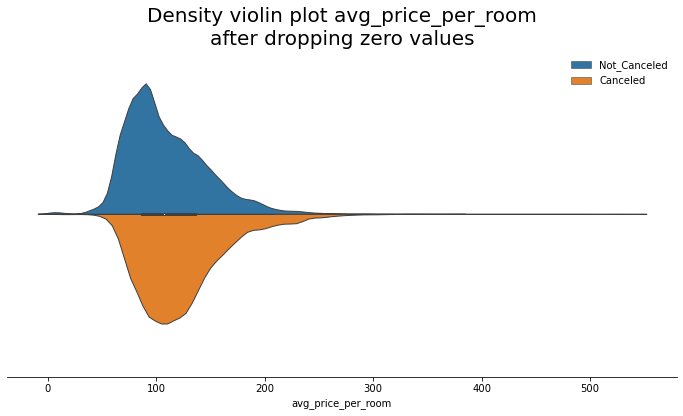

In [47]:
plt.figure(figsize = (12,6))
df['all'] = ""
ax= sns.violinplot(data = df[['avg_price_per_room', "booking_status", "all"]], y = "all", x = 'avg_price_per_room', 
                   hue = "booking_status", split =True, linewidth=1)
ax.set_title("Density violin plot avg_price_per_room\nafter dropping zero values", fontsize = 20, y = 1)
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_ylabel('')
ax.yaxis.set_ticks_position('none')
x_lim = (0,max(df['avg_price_per_room']))
ax.xlim = (x_lim)
plt.legend(loc=1, fontsize=10, frameon = False)
plt.show()
df.drop("all", axis = 1, inplace = True)

## Discrete numerical features <a class="anchor" id="16"></a>

In [48]:
import matplotlib.ticker as ticker
feat_numeric_disc = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                     'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests']

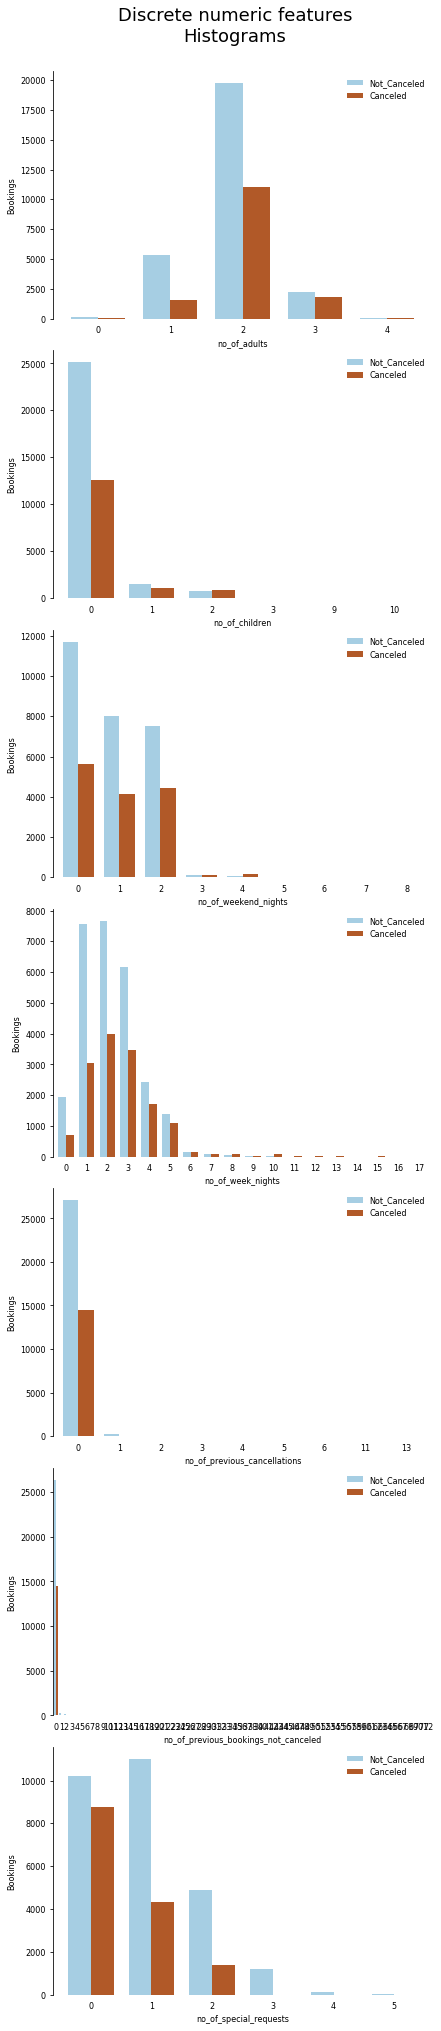

In [49]:
fig, axes = plt.subplots(nrows=len(feat_numeric_disc), ncols=1,figsize=(6, 4*len(feat_numeric_disc)))
fig.suptitle('Discrete numeric features\nHistograms', fontsize = 18, y = 1)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.2)
fig.tight_layout()
plt.rcParams['ytick.labelsize']=8
for i , j in zip(feat_numeric_disc,axes):
    x_lim = (min(df[i]),max(df[i]))
    
    A = df.groupby([i])['booking_status'].value_counts().unstack(level=-1)[['Not_Canceled', 'Canceled']]
    A = A.fillna(0)
    A.plot(kind = 'bar', colormap='Paired', ax=j, width=0.75, rot=0, fontsize = 8)
    
    j.spines.right.set_visible(False)
    j.spines.top.set_visible(False)
    j.spines.bottom.set_visible(False)
    j.legend(['Not_Canceled', 'Canceled'], frameon=False, fontsize = 8)
    j.set_xlabel(i, fontsize = 8)
    j.set_ylabel('Bookings', fontsize = 8)
    j.xaxis.set_ticks_position('none')  
        
plt.show(fig); plt.close(fig)

## Binary and categorical features <a class="anchor" id="17"></a>

In [50]:
feat_numeric_bin_cat =['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type',
                       'repeated_guest']

for i in feat_numeric_bin_cat:
    A = df.groupby([i])['booking_status'].value_counts().unstack()[['Not_Canceled', 'Canceled']]
    A.fillna(value = 0, inplace=True)
    A = A.astype('int32', copy = True)
    B = pd.crosstab(df[i], df['booking_status'], normalize = 'index')[['Not_Canceled', 'Canceled']]
    B = B.transform(lambda x: x.round(3)*100)
    B.columns = ['Not_Canceled %', 'Canceled %']
    display(pd.concat([A,B], axis=1))

,Not_Canceled,Canceled,Not_Canceled %,Canceled %
type_of_meal_plan,,,,
Meal Plan 1,20811,10503,66.5,33.5
Meal Plan 2,1098,855,56.2,43.8
Meal Plan 3,0,1,0.0,100.0
Not Selected,5549,3118,64.0,36.0


,Not_Canceled,Canceled,Not_Canceled %,Canceled %
required_car_parking_space,,,,
0,26211,14297,64.7,35.3
1,1247,180,87.4,12.6


,Not_Canceled,Canceled,Not_Canceled %,Canceled %
room_type_reserved,,,,
Room_Type 1,20074,9215,68.5,31.5
Room_Type 2,418,274,60.4,39.6
Room_Type 3,3,2,60.0,40.0
Room_Type 4,5616,3683,60.4,39.6
Room_Type 5,512,367,58.2,41.8
Room_Type 6,689,826,45.5,54.5
Room_Type 7,146,110,57.0,43.0


,Not_Canceled,Canceled,Not_Canceled %,Canceled %
market_segment_type,,,,
Aviation,162,33,83.1,16.9
Complementary,39,0,100.0,0.0
Corporate,1772,167,91.4,8.6
Offline,4973,804,86.1,13.9
Online,20512,13473,60.4,39.6


,Not_Canceled,Canceled,Not_Canceled %,Canceled %
repeated_guest,,,,
0,26354,14467,64.6,35.4
1,1104,10,99.1,0.9


## Bivariate Analysis <a class="anchor" id="18"></a>

In [51]:
features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status']

df['market_segment_type'].replace(['Online', 'Offline', 'Corporate', 'Aviation', 'Complementary'],
                                  [0, 1, 2, 3, 4], inplace=True)
df['type_of_meal_plan'].replace(['Not Selected', 'Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3'],
                                [0, 1, 2, 3], inplace=True)
df['room_type_reserved'].replace(['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6', 'Room_Type 7'],
                                 [0, 1, 2, 3, 4, 5, 6], inplace=True)
df['booking_status'].replace(['Not_Canceled', 'Canceled'], [0, 1], inplace=True)
display(df[features].dtypes)

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

### Correlation matrix <a class="anchor" id="19"></a>

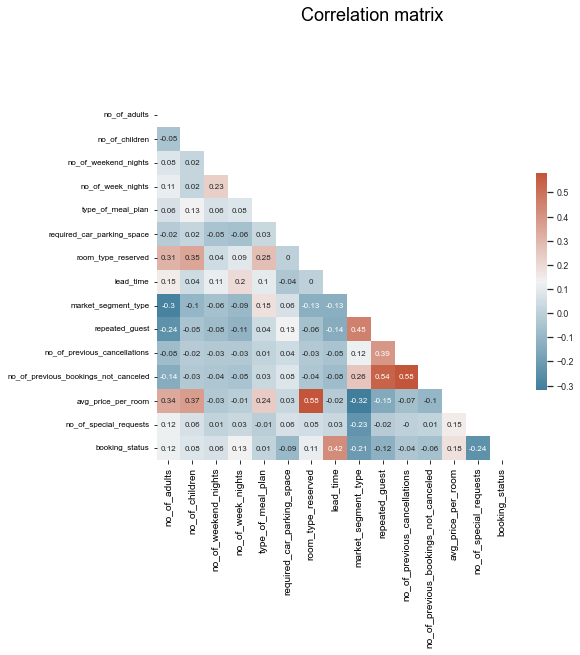

In [52]:
fig, ax = plt.subplots(figsize=(8,8))

fig.suptitle('Correlation matrix', fontsize = 18)
corr = df[features].corr().round(2)
mask = np.triu(np.ones_like(df[features].corr()))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(font_scale=0.8)
sns.heatmap(corr, annot = True, cmap=cmap, ax=ax, annot_kws={"size":8}, cbar_kws={"shrink": .5}, square = True, mask = mask)
plt.show(fig); plt.close(fig)

### Bivariate relation most predicting features <a class="anchor" id="20"></a>

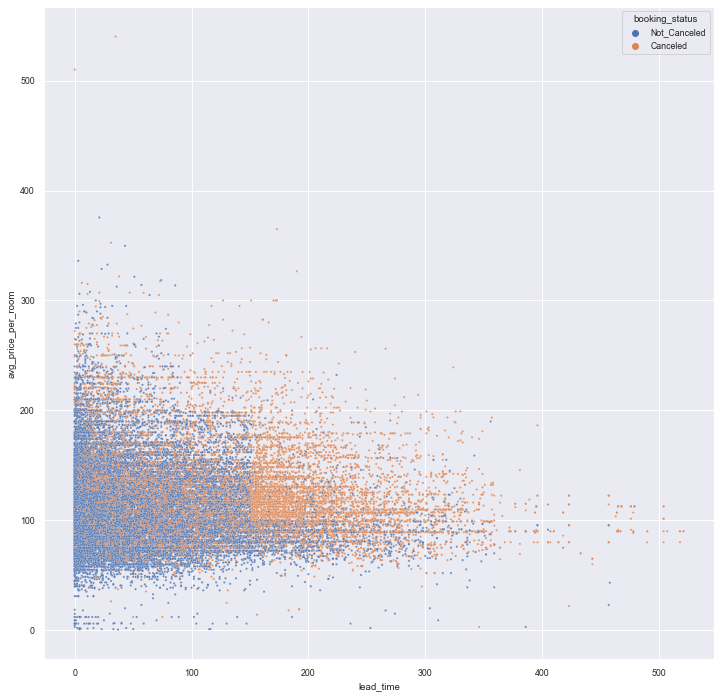

In [53]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(12,12))

legend_map = {0: 'Not_Canceled', 1: 'Canceled'}

A = df[['lead_time', 'avg_price_per_room', 'booking_status']]
sns.scatterplot(data=A, x='lead_time', y='avg_price_per_room', hue = df['booking_status'].map(legend_map),
               s=5, alpha=0.8, ax = ax)

plt.show(fig); plt.close(fig)

# Models <a class="anchor" id="21"></a>

## Importing Modules <a class="anchor" id="23"></a>

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline

## Logistic Regression <a class="anchor" id="24"></a>

### Features selection <a class="anchor" id="25"></a>

In [55]:
features_numerical = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time',
                      'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                      'avg_price_per_room', 'no_of_special_requests']
features_categorical = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
features_binary = ['required_car_parking_space','repeated_guest']

x_numerical = df[features_numerical]
x_categorical = df[features_categorical]
x_binary = df[features_binary]

display(df[features_categorical])
display(x_categorical)

,type_of_meal_plan,room_type_reserved,market_segment_type
0,1,0,1
1,0,0,0
2,1,0,0
3,1,0,0
4,0,0,0
...,...,...,...
56920,1,0,0
56921,2,3,0
56922,1,0,1
56923,0,0,0


,type_of_meal_plan,room_type_reserved,market_segment_type
0,1,0,1
1,0,0,0
2,1,0,0
3,1,0,0
4,0,0,0
...,...,...,...
56920,1,0,0
56921,2,3,0
56922,1,0,1
56923,0,0,0


### Encode categorical features <a class="anchor" id="26"></a>

In [56]:
#encoder using get_dummies
x_categorical_encoded = pd.DataFrame(index = df.index)
for i in features_categorical:
    dummy = pd.get_dummies(x_categorical[i], prefix=i)
    x_categorical_encoded = pd.concat([x_categorical_encoded,dummy], axis=1)

x_categorical_encoded.drop(['type_of_meal_plan_0', 'room_type_reserved_0', 'market_segment_type_0'], axis=1, inplace=True)

display(x_categorical_encoded.head())

,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4
0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


### Split sets <a class="anchor" id="27"></a>

In [57]:
# dependant variable values changed to binary
y = df['booking_status'].replace({'Not_Canceled':0, 'Canceled':1})
# independant variables
x = pd.concat([x_categorical_encoded, x_binary, x_numerical], axis = 1)
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

### Scale features <a class="anchor" id="28"></a>

In [58]:
# MinMax preferred as binary features are included
scaler = MinMaxScaler()
# fit scaler using train set
scaler.fit(x_train)
# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Fit model  <a class="anchor" id="29"></a>

In [59]:
reg = LogisticRegression(penalty = 'l2', C=1000, solver = 'liblinear')
reg.fit(x_train_scaled, y_train)
# prediction
y_pred = reg.predict(x_test_scaled)

### Coefficients <a class="anchor" id="30"></a>

In [60]:
# Here are the regression coefficients and intercept
print('Regression Coeffs:')#, model.coef_)
coef =sorted(zip(x.columns, *reg.coef_), key = lambda x:x[1], reverse = True)
for i in coef:
    print (i[0], ': ', i[1].round(3))
print('Intercept:\n', *reg.intercept_.round(3))

Regression Coeffs:
lead_time :  8.564
avg_price_per_room :  8.324
type_of_meal_plan_3 :  4.359
no_of_previous_cancellations :  2.713
no_of_week_nights :  1.398
room_type_reserved_2 :  1.183
no_of_children :  0.84
no_of_weekend_nights :  0.291
room_type_reserved_3 :  -0.116
market_segment_type_3 :  -0.125
no_of_adults :  -0.164
room_type_reserved_4 :  -0.256
type_of_meal_plan_1 :  -0.271
room_type_reserved_1 :  -0.391
room_type_reserved_5 :  -0.403
type_of_meal_plan_2 :  -0.43
room_type_reserved_6 :  -0.625
market_segment_type_2 :  -0.8
required_car_parking_space :  -1.428
market_segment_type_1 :  -2.276
no_of_previous_bookings_not_canceled :  -2.437
repeated_guest :  -2.722
no_of_special_requests :  -6.51
market_segment_type_4 :  -7.089
Intercept:
 -2.473


### Scores <a class="anchor" id="31"></a>

In [61]:
print("The accuracy score of the model for Train is {:.3f}".format(reg.score(x_train_scaled, y_train)))
print("The accuracy score of the model for Test is {:.3f}".format(reg.score(x_test_scaled, y_test)))
print('------------------------------------------------')
print('Accuracy score:\n', accuracy_score(y_test, y_pred).round(3))
print('Precision score:\n', precision_score(y_test, y_pred).round(3))
print('Recall score:\n', recall_score(y_test, y_pred).round(3))
print('ROC-AUC:\n', roc_auc_score(y_test, y_pred).round(3))
print('-------------------------------------------------')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

The accuracy score of the model for Train is 0.791
The accuracy score of the model for Test is 0.784
------------------------------------------------
Accuracy score:
 0.784
Precision score:
 0.728
Recall score:
 0.592
ROC-AUC:
 0.738
-------------------------------------------------
Confusion matrix:
[[6086  797]
 [1468 2133]]


### GridSearch <a class="anchor" id="32"></a>

In [62]:
#%%time
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1','l2'], 'C':[1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
grid_search = GridSearchCV(estimator = reg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           verbose=0)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(C=1000, solver='liblinear'),
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [63]:
print(" Results from Grid Search " )
print("\n The best accuracy score across ALL searched params:\n",grid_search.best_score_.round(3))
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

 Results from Grid Search 

 The best accuracy score across ALL searched params:
 0.79

 The best parameters across ALL searched params:
 {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


### Cross-validation <a class="anchor" id="33"></a>

In [64]:
#%%time
# correct data preparation for model evaluation with k-fold cross-validation using pipeline with scaler and model for each k-fold

# define the pipeline
pipeline = Pipeline(steps = [('scaler', MinMaxScaler()), ('model', LogisticRegression(penalty = 'l1', C=1, solver = 'liblinear'))])
# define the evaluation procedure
SKF = StratifiedKFold(n_splits=7, random_state=0, shuffle=True)
# evaluate the model using cross-validation
score_accuracy = cross_val_score(pipeline, x, y, scoring='accuracy', cv=SKF)

# report performance
print('Accuracy scores of each k-fold:\n', *score_accuracy.round(3))
print('Mean accuracy: %.3f (%.3f)' % (np.mean(score_accuracy)*100, np.std(score_accuracy)*100))

Accuracy scores of each k-fold:
 0.792 0.781 0.792 0.789 0.791 0.789 0.788
Mean accuracy: 78.896 (0.353)


## Decision Tree <a class="anchor" id="34"></a>

### Features selection <a class="anchor" id="35"></a>

In [65]:
features_numerical = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time',
                      'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                      'avg_price_per_room', 'no_of_special_requests']
features_categorical = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
features_binary = ['required_car_parking_space','repeated_guest']

x_numerical = df[features_numerical]
x_categorical = df[features_categorical]
x_binary = df[features_binary]

### Encode categorical features <a class="anchor" id="36"></a>

In [66]:
#encoder using get_dummies
x_categorical_encoded = pd.DataFrame(index = df.index)
for i in features_categorical:
    dummy = pd.get_dummies(x_categorical[i], prefix=i)
    x_categorical_encoded = pd.concat([x_categorical_encoded,dummy], axis=1)

x_categorical_encoded.drop(['type_of_meal_plan_0', 'room_type_reserved_0', 'market_segment_type_0'], axis=1, inplace=True)

### Split sets <a class="anchor" id="37"></a>

In [67]:
# dependant variable values changed to binary
y = df['booking_status'].replace({'Not_Canceled':0, 'Canceled':1})
# independant variables
x = pd.concat([x_categorical_encoded, x_binary, x_numerical], axis = 1)
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

### Fit model <a class="anchor" id="38"></a>

In [68]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 2)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

### Scores <a class="anchor" id="39"></a>

In [69]:
#Scores
print("The accuracy score of the model for Train is {:.3f}".format(dt.score(x_train, y_train)))
print("The accuracy score of the model for Test is {:.3f}".format(dt.score(x_test, y_test)))
print('------------------------------------------------')
print('Accuracy score:\n', accuracy_score(y_test, y_pred).round(3))
print('Precision score:\n', precision_score(y_test, y_pred).round(3))
print('Recall score:\n', recall_score(y_test, y_pred).round(3))
print('ROC-AUC:\n', roc_auc_score(y_test, y_pred).round(3))
print('-------------------------------------------------')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

The accuracy score of the model for Train is 0.835
The accuracy score of the model for Test is 0.822
------------------------------------------------
Accuracy score:
 0.822
Precision score:
 0.777
Recall score:
 0.676
ROC-AUC:
 0.787
-------------------------------------------------
Confusion matrix:
[[6183  700]
 [1166 2435]]


### GridSearch <a class="anchor" id="40"></a>

In [70]:
#%%time
parameters = {'criterion':['gini','entropy'],'max_depth':[2, 5, 10, 20, 30, 50], 'min_samples_leaf' : [1, 2, 3, 4, 5]}

grid_search = GridSearchCV(estimator = dt,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           verbose=0)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=2,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                              min_samples_leaf=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20, 30, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [71]:
print(" Results from Grid Search " )
print("\n The best score across ALL searched params:\n",grid_search.best_score_.round(3))
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

 Results from Grid Search 

 The best score across ALL searched params:
 0.823

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}


### Cross-validation <a class="anchor" id="41"></a>

In [72]:
#%%time
# define the evaluation procedure
SKF = StratifiedKFold(n_splits=7, random_state=0, shuffle=True)
# evaluate the model using cross-validation
scores = cross_validate(DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 3), x, y,
                        scoring= ('accuracy', 'precision') , cv=SKF)
# report performance
print('Accuracy scores of each k-fold:\n', *scores['test_accuracy'].round(3))
print('Mean accuracy: %.3f (%.3f)' % (np.mean(scores['test_accuracy'])*100, np.std(scores['test_accuracy'])*100))
print('-------------------------------------------------')
print('Precision scores of each k-fold:\n', *scores['test_precision'].round(3))
print('Precision: %.3f (%.3f)' % (np.mean(scores['test_precision'])*100, np.std(scores['test_precision'])*100))

Accuracy scores of each k-fold:
 0.822 0.818 0.829 0.818 0.825 0.827 0.826
Mean accuracy: 82.358 (0.387)
-------------------------------------------------
Precision scores of each k-fold:
 0.785 0.776 0.777 0.772 0.772 0.785 0.775
Precision: 77.756 (0.504)
